In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
%pip install textblob
%pip install wordcloud
%pip install tweepy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [6]:
consumerKey = 'XpwCpsjeXRKMImORrfnMkR7YE'
consumerSecret = 'puiGr3ts6TCaRgo8yrBgNXC6NBhUynRPZdwsShtbBcu8YAm4jY'
accessToken = '992426210595688448-6XZeXmJV9aLFY8y1kN0fRRB2a5kOIHG'
accessTokenSecret = '3wpmZT7I7cta9RsukyHYLfssduDY7qbMOALTLfCJDxrxf'


In [7]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [8]:
# Extract 100 tweets from the twitter user
posts = api.home_timeline(screen_name="ArvindKejriwal",
                          count=100, lang="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: screen_name
Unexpected parameter: lang


Show the 5 recent tweets:

1) What do you call someone who is a master at baiting?

2) Gee, I wonder why the screen is so dirty …

3) If you don’t like Twitter anymore, there is awesome site called Masterbatedone https://t.co/Jl7lpC5oEu

4) Hardcore Democrats or Republicans never vote for the other side, so independent voters are the ones who actually decide who’s in charge!

5) To independent-minded voters:

Shared power curbs the worst excesses of both parties, therefore I recommend voting for a Republican Congress, given that the Presidency is Democratic.



In [9]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()


,Tweets
0,What do you call someone who is a master at ba...
1,"Gee, I wonder why the screen is so dirty …"
2,"If you don’t like Twitter anymore, there is aw..."
3,Hardcore Democrats or Republicans never vote f...
4,To independent-minded voters:\n\nShared power ...


In [10]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
 text = re.sub('#', '', text)  # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text)  # Removing RT
 text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,What do you call someone who is a master at ba...
1,"Gee, I wonder why the screen is so dirty …"
2,"If you don’t like Twitter anymore, there is aw..."
3,Hardcore Democrats or Republicans never vote f...
4,To independent-minded voters:\n\nShared power ...
...,...
92,"“The New York Times has emerged as a new, chao..."
93,The perfect Bhai Dooj surprise is the gift of ...
94,:
95,Works on any moving land object


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity


def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df


,Tweets,Subjectivity,Polarity
0,What do you call someone who is a master at ba...,0.000000,0.000000
1,"Gee, I wonder why the screen is so dirty …",0.800000,-0.600000
2,"If you don’t like Twitter anymore, there is aw...",1.000000,1.000000
3,Hardcore Democrats or Republicans never vote f...,0.200000,-0.041667
4,To independent-minded voters:\n\nShared power ...,1.000000,-1.000000
...,...,...,...
92,"“The New York Times has emerged as a new, chao...",0.352273,0.193182
93,The perfect Bhai Dooj surprise is the gift of ...,1.000000,1.000000
94,:,0.000000,0.000000
95,Works on any moving land object,0.000000,0.000000


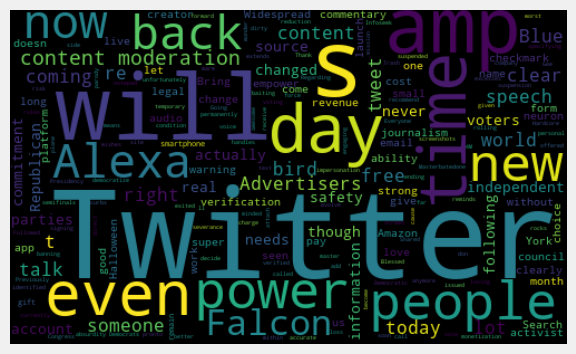

In [12]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [13]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,What do you call someone who is a master at ba...,0.000000,0.000000,Neutral
1,"Gee, I wonder why the screen is so dirty …",0.800000,-0.600000,Negative
2,"If you don’t like Twitter anymore, there is aw...",1.000000,1.000000,Positive
3,Hardcore Democrats or Republicans never vote f...,0.200000,-0.041667,Negative
4,To independent-minded voters:\n\nShared power ...,1.000000,-1.000000,Negative
...,...,...,...,...
92,"“The New York Times has emerged as a new, chao...",0.352273,0.193182,Positive
93,The perfect Bhai Dooj surprise is the gift of ...,1.000000,1.000000,Positive
94,:,0.000000,0.000000,Neutral
95,Works on any moving land object,0.000000,0.000000,Neutral


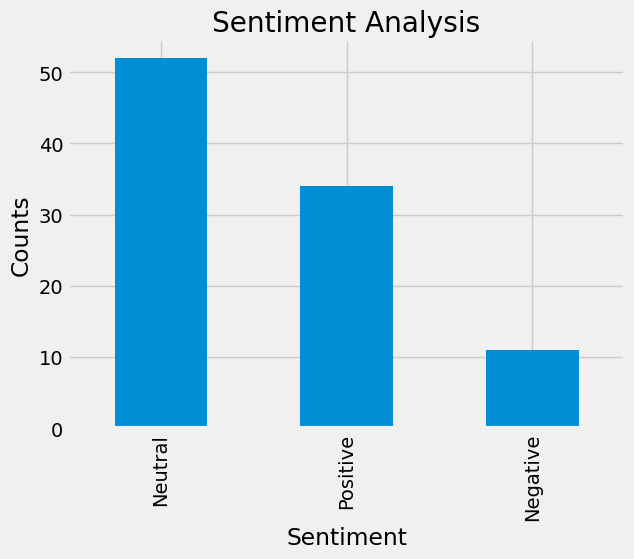

In [14]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
